# Principal Component Analysis

One challenge in machine learning is finding meaning in the data, particularly when it is very high dimensional. As such **dimensionality reduction**, which is a set of techniques that reduce the number of features in data, can be valuable. There are two situations in which we'd want to reduce dimensionality: Firstly, it allows us to visualise high dimensionality datasets by lowering the data dimensions to 2 or 3 dimensions. Secondly, it allows us to reduce the number of features in the data (although this comes at the cost of interpretability). When working with data which has a large amount of features (including NLP problems), doing so allows us to greatly reduce the number of model parameters which need to be optimised, which can save time and data (although in some cases this comes at the cost of feature interpretability).

One dimensionality reduction technique which we will look at in this bootcamp is principal component analysis (PCA). It involves linearly transforming the normalised data such that it varies mostly in the directions of its axes, that are then known as the **pricipal components** of the data. Doing so means that the most important information (that of greatest variation) is captured as the 1st principal component of that data, the second most along the 2nd principal component, the 3rd most along the 3rd and so on. As such, the less important information, which lies along higher principal components, can be discarded by ignoring the values of the data which lie in that direction. Mathematically, this is a projection onto the lower dimensional space spanned by the more important principal components.

Actually performing PCA is *relatively* simple. There are a couple ways to implement PCA, but we'll be focusing on the covariance approach here. Two concepts are required to be understood for you to be able to implement a PCA algorithm. Simply, a notion of covariance, and an understanding of eigenthings (eigenvectors and eigenvalues). Covariance allows us to capture the relationships between different variables, whilst eigenthings allow us to quantify the magnitude and direction of spread of some matrix/data.

## Covariance

![](https://www.statisticshowto.com/wp-content/uploads/2013/12/g-covariance.gif)
([Source](https://www.statisticshowto.com/covariance/)) 

So how do you capture the most important information? If we had a 3-d input space, but all of the data points lied at the same height above the x-y plane, then it would be obvious that the z axis values of each of the datapoints could be discarded. This is not because the z-values take any particular value, but because they have zero **variance**. Variance is the mean of the square differences of the feature from that features' mean value:

$$
Var(x) = \sigma^2 = \frac{\sum_i^m (x_i - \mu)^2}{m}
$$

In more than one dimensional space, data variance is characterised by a **covariance matrix**. Whereas the variance characterises averagely how much the feature varies from its mean, the covariance matrix defines how much the features vary together; if, as one feature positively increases away from its mean, another feature also increases positively from its mean, then those two features will have a positive covariance. The formula for the covariance essentially makes each element a linear combination of the distances of one feature from its mean, weighted by the same for another feature; As long as we scale (subtract mean and divide by range/s.d) each feature first, then the covariance matrix can be computed as $X^T X$. Because the product of the scaled features commutes, the covariance matrix is symmetric.

$$
Cov(X) = \Sigma = \frac{1}{m} \begin{bmatrix} \Sigma (x_1 - \mu_1)^2 & \dots & \Sigma (x_1 - \mu_1)(x_n - \mu_n)\\ \vdots & \ddots & \vdots \\\Sigma (x_n - \mu_n)(x_1 - \mu_1) & \dots & \Sigma (x_n - \mu_n)^2  \\ \end{bmatrix} = X^T X \in R^{n \times n}
$$

- Positive covariance: features vary in the same direction together (positively correlated)
- Negative covariance: features vary in opposite directions together (negatively correlated)
- (Near) zero covariance: features are uncorrelated

## Eigen-stuff
An eigenvector is a vector which does not change direction after a linear transformation is applied to it. In the image below, we have transformed three vectors by scaling it with a factor of 2 in the horizontal direction and a factor of 0.5 in the vertical direction. The transformation matrix is thus given by: $\begin{bmatrix}
2 & 0\\
0 & 0.5
\end{bmatrix}$
![](https://www.visiondummy.com/wp-content/uploads/2014/03/eigenvectors.png)

We see in the above image that the **eigenvectors** (those in red) do not change direction when a linear transformation is applied to them. All other vectors, however, do. Mathematically, a vector $\overrightarrow{v}$ is scaled by a transformation matrix $A$. Thus, $\overrightarrow{v'} = A\overrightarrow{v}$. For an arbitrary transformation matrix, the eigenvectors and eigenvalues are defined by the following formula:
$$
A\overrightarrow{v} = \lambda\overrightarrow{v}
$$

$\lambda$ is a scalar which specifies the **eigenvalue**. Any solution for the above equation given $A$ will require a $\lambda$. Note that eigenvalues do not take on the value 0 as this is a trivial solution

## PCA
The covariance matrix can be throught of as a transformation of the n dimensional space (as it is a function of each of the features) and is characterised by its eigenvectors which define how that transformation stretches the space. The space is stretched most by a factor of the largest eigenvalue, and least by a factor of the smallest eigenvalue; all points in space which do not lie along the corresponding eigenvectors are scaled by a factor between these two eigenvalues. Because it is symmetric the covariance matrix has orthogonal eigenvectors (a property of a rotation), but the eigenvectors are not of unit length, so the transformation also stretches the space in directions and amounts corresponding to these eigenvectors.

Whew! That's all the theory actually done. As far as actually implmenting PCA goes, it's relatively straightfoward:
1. Standardise your data
2. Calculate the covariance matrix
3. Calculate the eigenvectors and eigenvalues
4. Reduce the dimensionality!
  1. Truncate the eigenvectors to your chosen number of dimensionality
  2. Matrix multiply your truncated eigenvectors by your standardised matrix
5. Plot! (If you've chosen a dimensionality less than 3)

Compressing data using PCA looks like this:
<img src='images/pcafigs1.png'>
<img src='images/pcafigs2.png'>

## The code

In [1]:
import numpy as np      # effective math
import matplotlib.pyplot as plt     # ultimate plotting tool
from mpl_toolkits.mplot3d import Axes3D     # 3D plots
import pandas as pd     # allow us to make dataframes to store our data cleanly
from sklearn import datasets

In [2]:
data = pd.read_csv('../DATA/iris.csv')

label_dict = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}  # dictionary containing label to number mapping
data["variety"] = data["variety"].replace(label_dict)

X = data[["sepal.length", "sepal.width", "petal.length", "petal.width"]]
Y = data["variety"]

print(X.shape)      # 150 rows (datapoints), 4 columns (features)
print(Y.shape)      # 150 single dimension labels

m = X.shape[0]      # 150 rows

data

(150, 4)
(150,)


sepal.length  sepal.width  petal.length  petal.width  variety
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

To compute our covariance matrix from $X^TX$, we must scale our features:

In [3]:
def standardise(x):
    """Centre around mean and divide by range to put all features on similar scale"""
    ## Standardise the data
  
X_std = standardise(X)    # centre data around mean and divide by range/s.d
X_std

sepal.length  sepal.width  petal.length  petal.width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]

Now lets find the covariance of our data and its eigenvalues and eigenvectors

In [4]:
def decompose(x):
    """Compute the covariance matrix of the data and find its eigen properties"""
    ## Compute the Covariance matrix

    ## Compute the eigenstuff
   
    return eig_vals, eig_vecs, cov

X_std = np.array(X_std)
eig_vals, eig_vecs, covariance = decompose(X_std)      # compute the covariance matrix and find its characteristics


Covariance matrix
[[150.         -17.63546762 130.76306638 122.69116894]
 [-17.63546762 150.         -64.26601565 -54.91888988]
 [130.76306638 -64.26601565 150.         144.42981471]
 [122.69116894 -54.91888988 144.42981471 150.        ]]

Eigenvectors
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues
[437.77467248 137.10457072  22.01353134   3.10722546]


We can visualise how each eigenvector contributes to the variance of our data by conparing their eigenvectors. The eigenvalues define how much each eigenvector has scaled the space, which corresponds to the variance of the data in each orthogonal direction. The eigenvectors with greater eigenvalues correspond to the directions which the data varies more in and hence contain more information. We will keep those which are most important and throw away the others to reduce the dimensionality of our data.

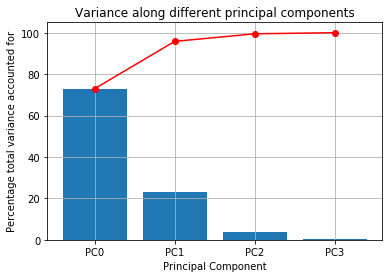

In [5]:
def whicheigs(eig_vals):
    """"Plot the variance accounted for by each eigenvector and their cumulative sum"""
    total = sum(eig_vals)   # sum up the eigenvalues so we can compare each one to the total to determine their importance
    var_percent = [(i/total) * 100 for i in eig_vals]   # calculate the percentage variance of the data which this eigenvalue accounts for
    cum_var_percent = np.cumsum(var_percent)    # make a vector of the cumulative sum of the variance percentages

    fig = plt.figure()      # make a figure
    ax =  fig.add_subplot(111)      # add an axis
    plt.title('Variance along different principal components')
    ax.grid()
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage total variance accounted for')

    ax.plot(cum_var_percent, '-ro')     # plot the cumulative sum of the variances accounted for by each eigenvector
    ax.bar(range(len(eig_vals)), var_percent) # position, height # show how much variance individual eig accounts for
    plt.xticks(np.arange(len(eig_vals)), ('PC{}'.format(i) for i in range(len(eig_vals))))  # set the xticks to 'PC1' etc
    plt.show()  # show us the figure
    
whicheigs(eig_vals)     # visualise the variance of the data for each eigenvector of the covariance matrix

Now, using the matrix of eigenvectors which we returned above, we can throw away the less important vectors (the end columns) and rotate our data such that these become the axes which describe it.

In [6]:
def reduce(x, eig_vecs, dims):
    """reduce the number of dimensions of our data by transforming by the truncated matrix of covariance eigenvectors"""
    W = eig_vecs[:, :dims]
    print('\nDimension reducing matrix')
    print(W)
    return np.matmul(x, W), W

dim = 2
X_reduced, transform = reduce(X_std, eig_vecs, dim)     # transform our data into a lower dimension

print(X_reduced.shape)
print(transform.shape)


Dimension reducing matrix
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]
(150, 2)
(4, 2)


Now that we have transformed our data to a lower dimension, we can visualise it.

C:\Users\Nihir\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


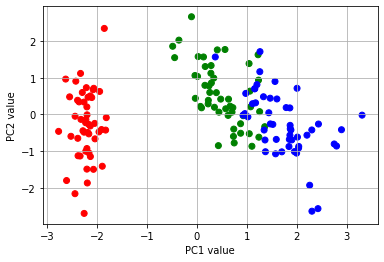

In [7]:
colour_dict = {0:'r', 1:'g', 2:'b'}     # map labels to colours for plotting
colour_list = [colour_dict[i] for i in list(Y)]     # generator to give list of colours corresponding to each class

def plotreduced(x, dim):
    """Plot the data which has been transformed to a visualisable dimension"""
    fig = plt.figure()      # make a figure
    plt.grid()
    if dim == 3:
        ax = fig.add_subplot(111, projection='3d')      # add a 3d set of axes
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=colour_list)    # scatter plot our 3d data
        plt.xlabel('PC1 value')
        plt.ylabel('PC2 value')
        ax.set_zlabel('PC3 value')
    elif dim == 2:
        ax = fig.add_subplot(111)      # add a 2d set of axes
        ax.scatter(x[:, 0], x[:, 1], c=colour_list)    # scatter plot our 3d data
        plt.xlabel('PC1 value')
        plt.ylabel('PC2 value')
    elif dim == 1:
        ax = fig.add_subplot(111)       # add a 2d axis
        ax.scatter(x, np.zeros_like(x), c=colour_list)      # plot the 1D data along the x axis (zero for each y value)
        plt.xlabel('PC1 Value')
    plt.show()
    return ax

ax = plotreduced(X_reduced, dim)      # check out how the data looks in a visualisable dimension

# t-SNE

Whilst PCA can be used for dimensionality reduction techniques and visualisation purposes, one particularly recent algorithm has seen a rise in popularity for data visualisation. This algorithm is [t-SNE](https://www.semanticscholar.org/paper/Visualizing-Data-using-t-SNE-Maaten-Hinton/1c46943103bd7b7a2c7be86859995a4144d1938b), which stands for "t-distributed stochastic neighbor embedding". The maths behind the algorithm is out of scope for this course, but intuitively, the algorithm has two steps. The first of which is to create a probability distribution for every point in the dataset in a manner that other points which are similar to this point are assigned a higher probability, and conversely, less similar points are assigned a lower probability. Secondly, the original data is randomly projected into a lower dimensional plane (2-d or 3-d). The algorithm constructs another set of probability distributions for each point in this lower dimensional plane, and using the higher dimensional set of probability distributions, it attempts to minimise the Kullback-Leibler divergence of the two by shifting around the points in the lower dimensional plane.

Note that the t-SNE algorithm is non-linear in nature (whereas PCA is linear). This means that t-SNE can model more complex relationships between features than PCA is able to do. To gain some intution behind what t-SNE can do, [this link](https://distill.pub/2016/misread-tsne/) is a brilliant resource.

We'll implement [t-SNE on a dataset using the sklearn module](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). For more information on effective usage, visit [sklearn's user guide](https://scikit-learn.org/stable/modules/manifold.html#t-sne)

C:\Users\Nihir\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


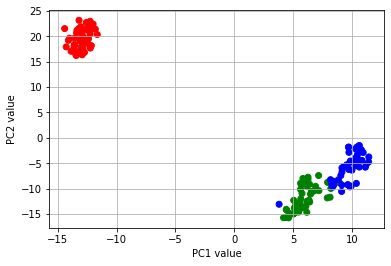

In [13]:
from sklearn.manifold import TSNE

dim = 2
X_tsne = TSNE(n_components=dim).fit_transform(X)
ax = plotreduced(X_tsne, dim)